In [60]:
!git clone https://github.com/johnloane/SD4A_BC_Data_23


fatal: destination path 'SD4A_BC_Data_23' already exists and is not an empty directory.


In [61]:
!ls


sample_data  SD4A_BC_Data_23


In [62]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Convolution2D, MaxPooling2D, Dropout, Flatten
import cv2
import pandas as pd
import random
import os
import ntpath
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg

In [63]:
datadir = "SD4A_BC_Data_23"
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names = columns)
print(data.head)

<bound method NDFrame.head of                                                  center  \
0     C:\Users\loanej\Desktop\SD4B_Training_Data\IMG...   
1     C:\Users\loanej\Desktop\SD4B_Training_Data\IMG...   
2     C:\Users\loanej\Desktop\SD4B_Training_Data\IMG...   
3     C:\Users\loanej\Desktop\SD4B_Training_Data\IMG...   
4     C:\Users\loanej\Desktop\SD4B_Training_Data\IMG...   
...                                                 ...   
8130  C:\Users\loanej\Desktop\SD4B_Training_Data\IMG...   
8131  C:\Users\loanej\Desktop\SD4B_Training_Data\IMG...   
8132  C:\Users\loanej\Desktop\SD4B_Training_Data\IMG...   
8133  C:\Users\loanej\Desktop\SD4B_Training_Data\IMG...   
8134  C:\Users\loanej\Desktop\SD4B_Training_Data\IMG...   

                                                   left  \
0     C:\Users\loanej\Desktop\SD4B_Training_Data\IMG...   
1     C:\Users\loanej\Desktop\SD4B_Training_Data\IMG...   
2     C:\Users\loanej\Desktop\SD4B_Training_Data\IMG...   
3     C:\Users\loanej\Des

In [64]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail


In [65]:
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)


In [66]:
print(data.head)

<bound method NDFrame.head of                                   center                              left  \
0     center_2023_11_30_12_14_59_186.jpg  left_2023_11_30_12_14_59_186.jpg   
1     center_2023_11_30_12_14_59_253.jpg  left_2023_11_30_12_14_59_253.jpg   
2     center_2023_11_30_12_14_59_324.jpg  left_2023_11_30_12_14_59_324.jpg   
3     center_2023_11_30_12_14_59_397.jpg  left_2023_11_30_12_14_59_397.jpg   
4     center_2023_11_30_12_14_59_464.jpg  left_2023_11_30_12_14_59_464.jpg   
...                                  ...                               ...   
8130  center_2023_11_30_12_24_48_586.jpg  left_2023_11_30_12_24_48_586.jpg   
8131  center_2023_11_30_12_24_48_656.jpg  left_2023_11_30_12_24_48_656.jpg   
8132  center_2023_11_30_12_24_48_725.jpg  left_2023_11_30_12_24_48_725.jpg   
8133  center_2023_11_30_12_24_48_792.jpg  left_2023_11_30_12_24_48_792.jpg   
8134  center_2023_11_30_12_24_48_868.jpg  left_2023_11_30_12_24_48_868.jpg   

                                 

In [67]:
num_bins = 25
hist, bins = np.histogram(data['steering'], num_bins)
print(bins)

[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]


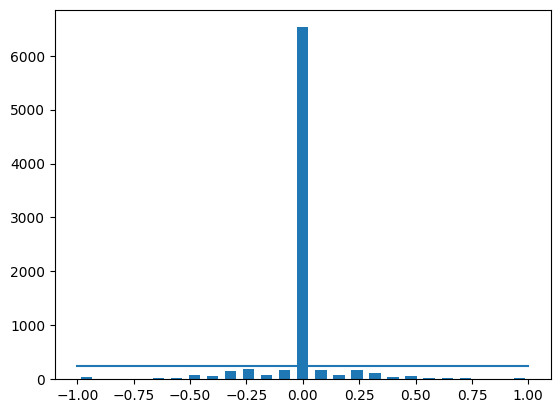

In [68]:
centre = (bins[:-1] + bins[1:])*0.5
samples_per_bin = 250
plt.bar(centre, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [69]:
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if bins[j] <= data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)


In [70]:
print("Removed: ", len(remove_list))
data.drop(data.index[remove_list], inplace = True)
print("Remaining: ", len(data))

Removed:  6277
Remaining:  1858


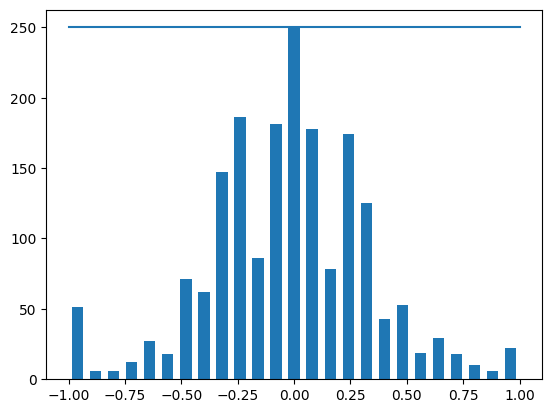

In [71]:
hist, bins = np.histogram(data['steering'], num_bins)
plt.bar(centre, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [72]:
# Training and Validation split
def load_img_steering(datadir, df):
  image_path = []
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths, steerings


In [73]:
image_paths, steerings = load_img_steering(datadir+'/IMG', data)
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)

In [74]:
print(f"Traing samples {len(X_train)}, validation samples {len(X_valid)}")

Traing samples 1486, validation samples 372


Text(0.5, 1.0, 'Validation set')

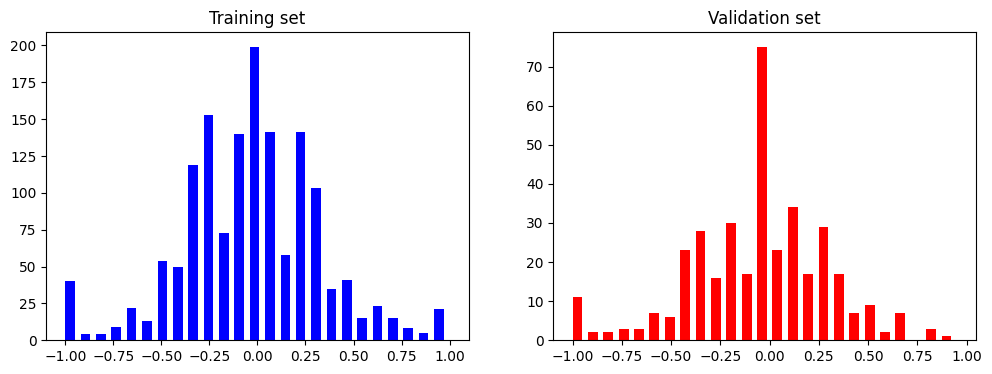

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].hist(y_train, bins = num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins = num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

In [76]:
def img_preprocess(img):
  img = mpimg.imread(img)
  img = img[60:135, :, :]
  img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
  img = cv2.GaussianBlur(img, (3,3), 0)
  img = cv2.resize(img, (200, 66))
  img = img/255
  return img

Text(0.5, 1.0, 'Preprocessed Image')

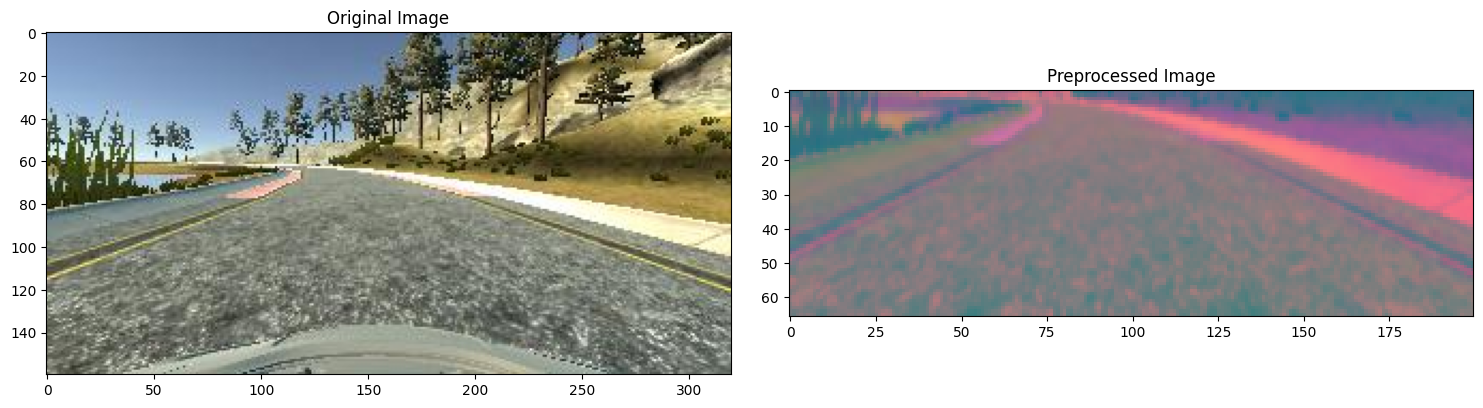

In [77]:
image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(image)
fig, axes = plt.subplots(1, 2, figsize=(15,10))
fig.tight_layout()
axes[0].imshow(original_image)
axes[0].set_title("Original Image")
axes[1].imshow(preprocessed_image)
axes[1].set_title("Preprocessed Image")


In [78]:
X_train = np.array(list(map(img_preprocess, X_train)))
X_valid = np.array(list(map(img_preprocess, X_valid)))

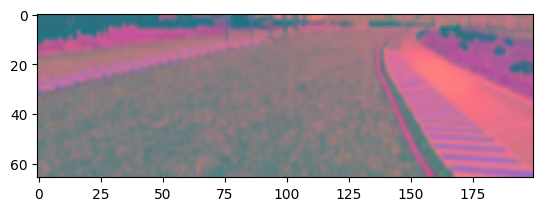

In [88]:
plt.imshow(X_train[random.randint(0, len(X_train)-1)])

In [109]:
# https://arxiv.org/pdf/1604.07316v1.pdf
def nvidia_model():
  model = Sequential()
  model.add(Convolution2D(24, kernel_size=(5,5), strides=(2,2), input_shape=(66, 200, 3), activation='elu'))
  model.add(Convolution2D(36, kernel_size=(5,5), strides=(2,2), activation='elu'))
  model.add(Convolution2D(48, kernel_size=(5,5), strides=(2,2), activation='elu'))
  model.add(Convolution2D(64, kernel_size=(3,3), activation='elu'))
  model.add(Convolution2D(64, kernel_size=(3,3), activation='elu'))
  model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(100, activation = 'elu'))
  model.add(Dropout(0.5))
  model.add(Dense(50, activation = 'elu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation = 'elu'))
  model.add(Dropout(0.5))
  model.add(Dense(1))

  optimizer = Adam(learning_rate = 0.001)
  model.compile(loss='mse', optimizer = optimizer)
  return model


In [110]:
model = nvidia_model()
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 31, 98, 24)        1824      
                                                                 
 conv2d_26 (Conv2D)          (None, 14, 47, 36)        21636     
                                                                 
 conv2d_27 (Conv2D)          (None, 5, 22, 48)         43248     
                                                                 
 conv2d_28 (Conv2D)          (None, 3, 20, 64)         27712     
                                                                 
 conv2d_29 (Conv2D)          (None, 1, 18, 64)         36928     
                                                                 
 dropout_13 (Dropout)        (None, 1, 18, 64)         0         
                                                                 
 flatten_5 (Flatten)         (None, 1152)             

In [111]:
history = model.fit(X_train, y_train, epochs=30, validation_data = (X_valid, y_valid), batch_size=100, verbose=1, shuffle=1)

Epoch 1/30
15/15 [==============================] - 4s 63ms/step - loss: 0.7987 - val_loss: 0.1252
Epoch 2/30
15/15 [==============================] - 0s 27ms/step - loss: 0.2061 - val_loss: 0.1065
Epoch 3/30
15/15 [==============================] - 0s 27ms/step - loss: 0.1537 - val_loss: 0.1121
Epoch 4/30
15/15 [==============================] - 0s 28ms/step - loss: 0.1486 - val_loss: 0.1021
Epoch 5/30
15/15 [==============================] - 0s 28ms/step - loss: 0.1235 - val_loss: 0.0958
Epoch 6/30
15/15 [==============================] - 0s 28ms/step - loss: 0.1235 - val_loss: 0.0906
Epoch 7/30
15/15 [==============================] - 0s 28ms/step - loss: 0.1155 - val_loss: 0.0917
Epoch 8/30
15/15 [==============================] - 0s 27ms/step - loss: 0.1114 - val_loss: 0.0831
Epoch 9/30
15/15 [==============================] - 0s 27ms/step - loss: 0.1035 - val_loss: 0.0815
Epoch 10/30
15/15 [==============================] - 0s 28ms/step - loss: 0.1068 - val_loss: 0.0780
Epoch 11/

Text(0.5, 0, 'Epoch')

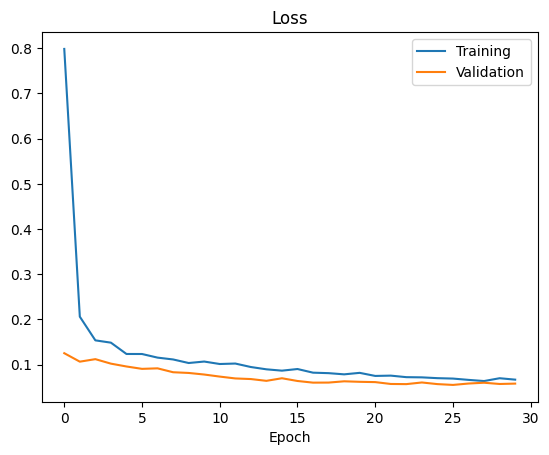

In [113]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [115]:
model.save('alpha_model.h5')

In [117]:
!ls
from google.colab import files
files.download('alpha_model.h5')

alpha_model.h5	sample_data  SD4A_BC_Data_23


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>